### Task 1

<font color="darkorange">
TECHNOLOGY:  

Python

CODE EDITOR:  
VS Code

Make a Fake news detecting system based on a data set with the help of
machine learning.

Data Set :
https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view  

Estimator:
PassiveAgressiveClassifier


### Importing required packages and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

### Reading the dataset

In [2]:
news_df=pd.read_csv("news.csv")

In [3]:
news_df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
news_df.shape

(6335, 4)

In [5]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


### Extracting the labels

In [6]:
news_df['label']

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

## Visualisation

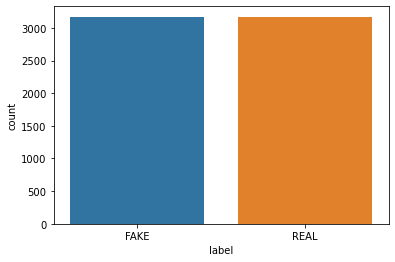

In [7]:
sns.countplot(data=news_df,x='label')

### Fake news Detection

In [8]:
# get the labels
labels=news_df['label']
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

#### Training the data

In [9]:
x_train,x_test,y_train,y_test=train_test_split(news_df['text'],labels,test_size=0.2,random_state=7)

### Using Tfid vector to classify the text

In [10]:
vector=TfidfVectorizer(stop_words='english',max_df=0.6)
vector_train=vector.fit_transform(x_train)
vector_test=vector.transform(x_test)

### Initialising a PassiveAgressiveClassifier

In [11]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(vector_train,y_train)
y_pred=pac.predict(vector_test)
score=accuracy_score(y_test,y_pred)
print(f"Accuracy:{round(score*100,2)}%")

Accuracy:92.9%


### plotting confusion matrix

In [12]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])


array([[589,  49],
       [ 41, 588]], dtype=int64)

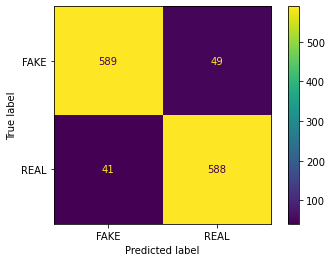

In [13]:
plot_confusion_matrix(pac,vector_test,y_test)

## Conclusion  
* Accuracy:92.9%
* True and positive:589
* True and negatives:587
* false and positives:42
* false and negatives:49 